In [3]:
## 0 ## : 필요 라이브러리 및 클래스 import
import numpy as np
from PIL import Image
from bldcsag768 import BLDCSAG768, SamImageProcessor, ImageGridDisplay

## 1 ## : SAM으로 object mask 생성
# - Generation time : 3~7s / GPU Memory Usage : 6460MiB
# - input image를 BLDC 폴더 내에 'img.png'의 이름으로 저장해주세요.
# - image_path 이름 되도록이면 변경하지 말아주세요.
# - mask가 잘 안 생성되면 mask_num를 0, 1, 2 중에 변경하면서 해주세요.
#   > 만약 0, 1, 2 세 개 다 시도하셔도 안되면 SAM의 한계입니다 . . . 
# - device는 밑 BLDCSAG768의 device와 다르게 설정해주세요.
img_processor = SamImageProcessor(img_path="img.png", mask_num = 2, device = 'cuda:1')
img_processor.run()

In [2]:
## 2 ## : BLDCSAG768로 output image 생성
# - Generation time : 34~35s(w/.SAG), 24~25s(w/o.SAG) / GPU Memory Usage : 5540MiB
# - prompt와 negative_prompt는 자유롭게 변경하면서 사용해주세요.
prompt='Dinosour is on the main street of New York city'
negative_prompt = "low quality, blurry, distorted, out of focus, low resolution, bad anatomy, bad proportions, extra limbs, missing limbs"


# - batch_size에 따라 ouput image('output.png')가 동시에 출력되는 개수가 달라집니다. (Default : 1)
# - blending_start_percentage에 따라 blending 과정을 얼마나 빠르게 시작할지 결정됩니다. (Default : 0.1, Recommend : [0.0,0.2])
# - device는 위 SAM의 device와 다르게 설정해주세요.
# - 이외 주석처리된 부분은 참고용 input으로, 실제 input이 아니므로 주석해제하시면 오류 발생합니다.
bld_controlnet = BLDCSAG768(
    prompt=prompt,
    negative_prompt=negative_prompt,
    # init_image='image.png',
    # mask='mask.png',
    # model_path='stabilityai/stable-diffusion-2-1',
    # controlnet_model_path='thibaud/controlnet-sd21-canny-diffusers',  # ControlNet SD 2.1 Canny model path
    batch_size=1,
    blending_start_percentage=0.10,
    device='cuda:2',
    # output_path='output.png'
)


# - num_inference_steps는 model이 inference 과정에서 진행할 sampling step입니다. (Default : 100, Recommend : [70,150])
# - guidance_scale는 prompt와 negative_prompt를 사용한 CFG Guidance scale 입니다. (Default : 7.0, Recommend : [7.0,7.5])
# - sag_scale은 SAG Guidance scale입니다. (Default : 0.8, Recommend : [0.7,0.9], SAG 미사용 시 0.0으로 설정해주시면 됩니다.)
results = bld_controlnet.edit_image(
    bld_controlnet.init_image,
    bld_controlnet.mask,
    num_inference_steps=100,    # Default : 100
    guidance_scale=7.0,         # Default : 7.0
    prompts=[bld_controlnet.prompt] * bld_controlnet.batch_size,
    negative_prompts = [bld_controlnet.negative_prompt] * bld_controlnet.batch_size,
    blending_percentage=bld_controlnet.blending_start_percentage,   # Default : 0.10
    sag_scale = 0.0,            # Default : 0.8 
)


results_flat = np.concatenate(results, axis=1)
Image.fromarray(results_flat).save(bld_controlnet.output_path)

An error occurred while trying to fetch thibaud/controlnet-sd21-canny-diffusers: thibaud/controlnet-sd21-canny-diffusers does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/intern1/mmai04/anaconda3/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/intern1/mmai04/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


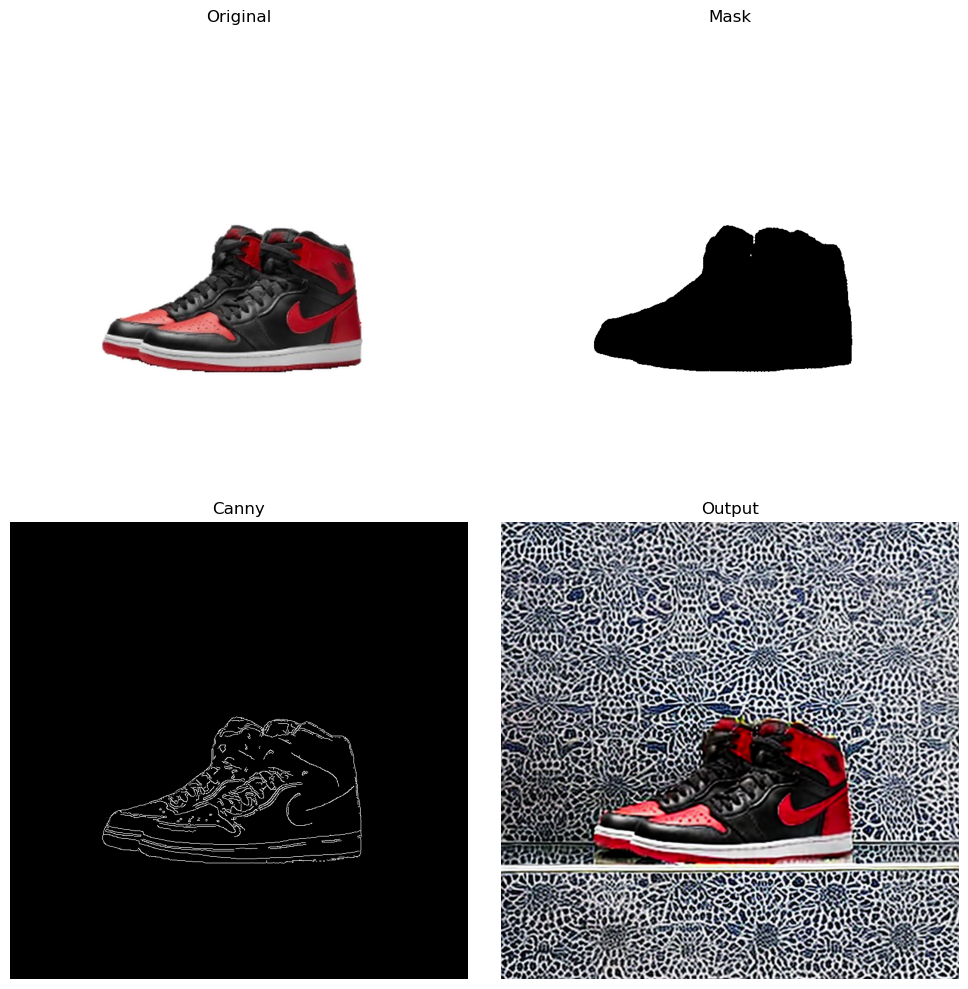

In [3]:
img_display = ImageGridDisplay('original.png', 'mask.png', 'canny.png', 'output.png', prompt)
img_display.display()